### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [279]:
data = pd.read_csv('data/coupons.csv')

In [280]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [281]:
data.info()
#Display all rows with any missing values
data[data.isnull().any(axis=1)]

data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [282]:
#Replace any missing numeric values with 0 inplace
data.fillna(0, inplace=True)  

print(data.columns)
#The STD on toCoupon_GEQ5min is 0 which means all the values are the same, we can drop it since it is not adding any value
#data.drop(columns='toCoupon_GEQ5min', inplace=True)

sorted(data['income'].dropna().unique().tolist())

print(data['age'].dropna().unique().tolist())

def convert_age(value):
    if value == '50plus':
        return 51
    elif value == 'below21':
        return 20
    else:
        return int(value)

data['age_numeric'] = data['age'].apply(convert_age)
data.info()
data.describe()

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
['21', '46', '26', '31', '41', '50plus', '36', 'below21']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   ex

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_numeric
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433,32.437480
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314,10.435134
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,31.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,41.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000


4. What proportion of the total observations chose to accept the coupon?



In [283]:
print(f'Proportion of total observations that chose to accept the coupon {(data['Y'] == 1).mean():.4f}')

Proportion of total observations that chose to accept the coupon 0.5684


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

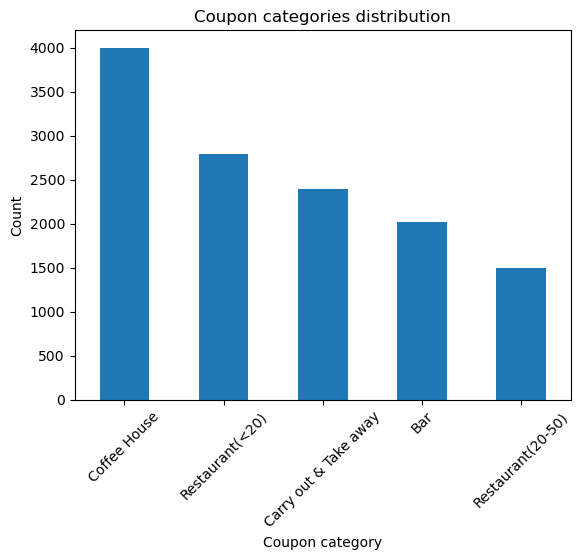

In [284]:
data['coupon'].value_counts().plot(kind = 'bar')
plt.title('Coupon categories distribution')
plt.xlabel('Coupon category')
plt.ylabel('Count')
plt.xticks(rotation = 45)


6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

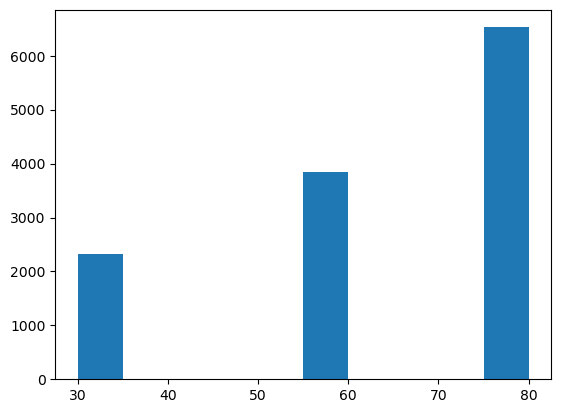

In [285]:
plt.hist(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [286]:
bar_df = data[data['coupon'] == 'Bar']
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [287]:
print(f'Proportion of bar coupons that were accepted {(bar_df['Y'] == 1).mean():.4f}')

Proportion of bar coupons that were accepted 0.4100


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [288]:
bar_df['Bar']

9        never
13       never
17       never
24       never
35       never
         ...  
12663    never
12664    never
12667    never
12670    never
12682    never
Name: Bar, Length: 2017, dtype: object

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [289]:
#data['Bar'].dropna().unique().tolist()
#['never', 'less1', '1~3', 'gt8', 0, '4~8']

#Age unique values
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']
goes_to_bar_more_than_once_over_25 = data[
    (data['age'].isin(['46', '26', '31', '41', '50plus', '36'])) &
    (data['Bar'].isin(['1~3', 'gt8','4~8'])) &
    (data['coupon'] == 'Bar')
]

print(f'Proportion of bar coupons from drivers aged over 25 and went to a bar more than once a month that were accepted {(goes_to_bar_more_than_once_over_25['Y'] == 1).mean():.4f}')

bar_remaining = data[
    (data['age'].isin(['21', 'below21'])) |
    (data['Bar'].isin(['never', 'less1', '0'])) &
    (data['coupon'] == 'Bar')
]

print(f'Proportion of bar coupons from other drivers {(bar_remaining['Y'] == 1).mean():.4f}')


Proportion of bar coupons from drivers aged over 25 and went to a bar more than once a month that were accepted 0.6952
Proportion of bar coupons from other drivers 0.5181


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [290]:
goes_to_bar_more_than_once_over_2 = data[
    (data['Bar'].isin(['1~3', 'gt8','4~8']) &
    data['passanger'].isin(['Friend(s)', 'Partner'])) &
    (data['coupon'] == 'Bar')
]

print(f'Proportion of bar coupons from drivers who went to a bar more than once a month and had passangers that were not a kidthat were accepted {(goes_to_bar_more_than_once_over_25['Y'] == 1).mean():.4f}')


occupation_not_farming_fishing_forestry = data[~data['occupation'].isin(['Farming Fishing & Forestry'])]
occupation_not_farming_fishing_forestry = occupation_not_farming_fishing_forestry[(occupation_not_farming_fishing_forestry['coupon'] == 'Bar')]

print(f'Proportion of bar coupons from drivers not in Farming Fishing & Forestry {(occupation_not_farming_fishing_forestry['Y'] == 1).mean():.4f}')


Proportion of bar coupons from drivers who went to a bar more than once a month and had passangers that were not a kidthat were accepted 0.6952
Proportion of bar coupons from drivers not in Farming Fishing & Forestry 0.4099


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Proportion of bar coupons from drivers not widowed and goes to bars 0.7179
Proportion of bar coupons from drivers under 30 goes to bars 0.7217
Proportion of bar coupons from drivers going to cheap restraurants and low income 0.4113


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unmarried partner'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

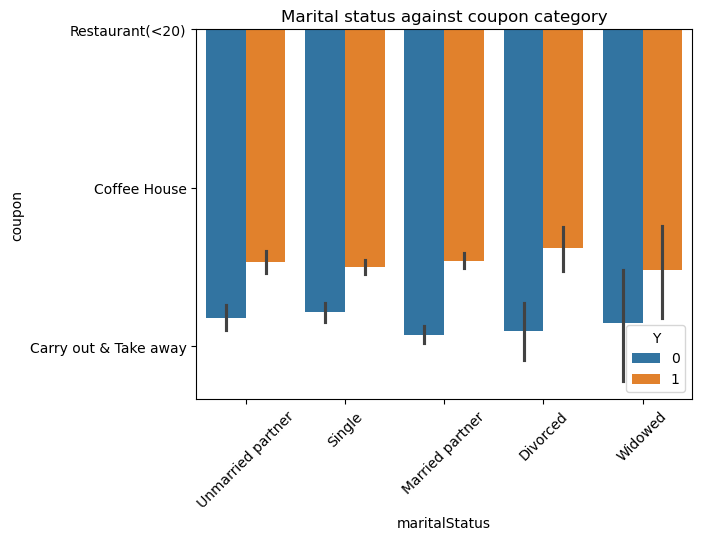

In [330]:
goes_to_bar_more_than_once_with_friends_partner_not_widowed = data[
    (data['Bar'].isin(['1~3', 'gt8','4~8']) &
    data['passanger'].isin(['Friend(s)', 'Partner']) &
     data['maritalStatus'].isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced'])&
    (data['coupon'] == 'Bar')
    )]

print(f'Proportion of bar coupons from drivers not widowed and goes to bars {(goes_to_bar_more_than_once_with_friends_partner_not_widowed['Y'] == 1).mean():.4f}')

goes_to_bar_more_than_once_under_30 = data[
    (data['Bar'].isin(['1~3', 'gt8','4~8']) &
    data['age'].isin(['below21', '21', '26'])&
    (data['coupon'] == 'Bar')
    )]
print(f'Proportion of bar coupons from drivers under 30 goes to bars {(goes_to_bar_more_than_once_under_30['Y'] == 1).mean():.4f}')

goes_to_bar_more_than_4_times_cheap_restaurant_low_income = data[
    (
    data['RestaurantLessThan20'].isin(['4~8', '1~3', 'less1', 'gt8']) &
    data['income'].isin(['$37500 - $49999','$12500 - $24999', 'Less than $12500', '$25000 - $37499'])&
    (data['coupon'] == 'Bar')
    )]
print(f'Proportion of bar coupons from drivers going to cheap restraurants and low income {(goes_to_bar_more_than_4_times_cheap_restaurant_low_income['Y'] == 1).mean():.4f}')


sns.barplot(data = data, 
            x='maritalStatus', y='coupon', hue='Y')
plt.title('Marital status against coupon category')
plt.xticks(rotation = 45)



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
People with low income and going to cheap restaurants had acceptance rate less than the people going to bars more often with partners or friends. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

([0, 1, 2, 3, 4],
 [Text(0, 0, '2PM'),
  Text(1, 0, '10AM'),
  Text(2, 0, '6PM'),
  Text(3, 0, '7AM'),
  Text(4, 0, '10PM')])

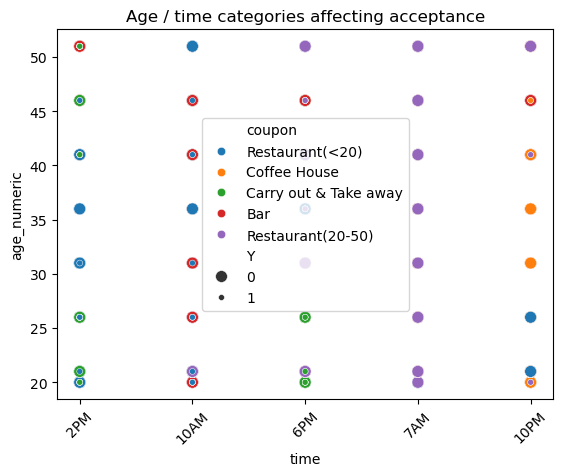

In [316]:
#Age and time affecting coupon acceptance
#Restaurant coupons accepted during lunch and dinner rush with carry out being more popular with younger drivers.

sns.scatterplot(data=data, y='age_numeric', x='time', hue ='coupon', size='Y')
plt.title('Age / time categories affecting acceptance')
plt.xticks(rotation = 45)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

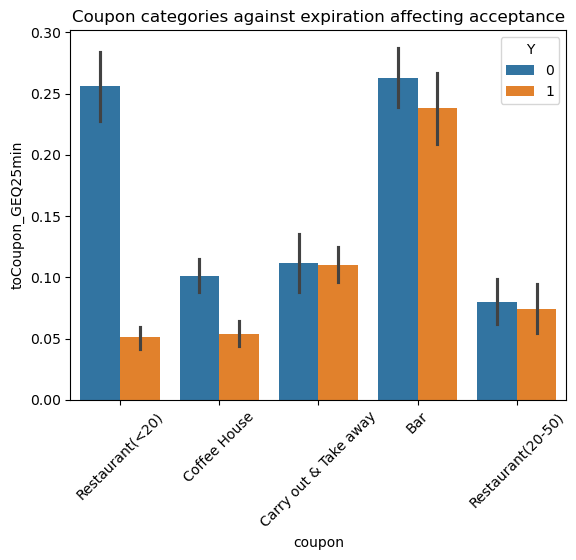

In [315]:
#Cheap restraurants have low coupon acceptance rates even though they tend to expire longer. 
sns.barplot(data = data, x='coupon', y='toCoupon_GEQ25min', hue='Y')
plt.title('Coupon categories against expiration affecting acceptance')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

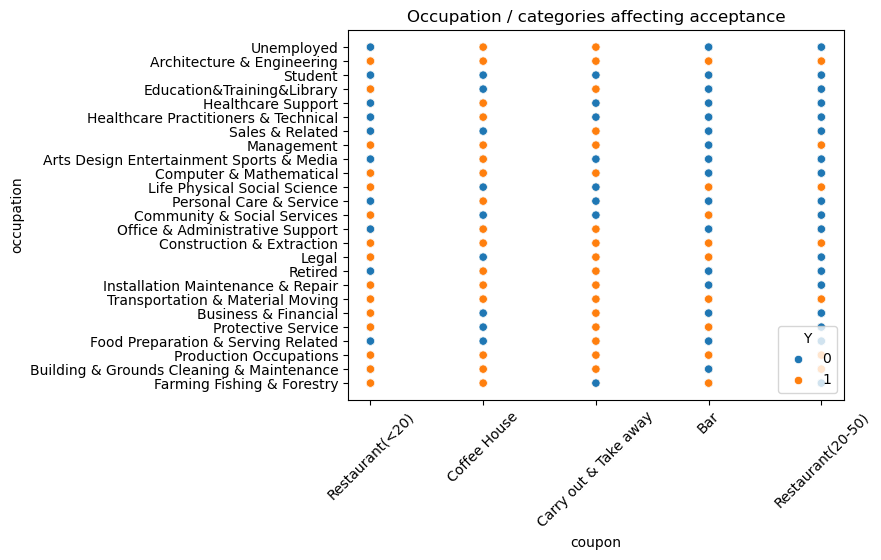

In [346]:
sns.scatterplot(data = data, x='coupon', y='occupation', hue='Y')
plt.title('Occupation / categories affecting acceptance')
plt.xticks(rotation = 45)